- Read in sheets from the excel

In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px


df_english = pd.read_excel("../data/riket2023_åk9_np (1).xlsx", sheet_name="Engelska", skiprows=8)
df_mathematics = pd.read_excel("../data/riket2023_åk9_np (1).xlsx", sheet_name="Matematik", skiprows=8)
df_swedish = pd.read_excel("../data/riket2023_åk9_np (1).xlsx", sheet_name="Svenska", skiprows=8)
df_swedish_2 = pd.read_excel("../data/riket2023_åk9_np (1).xlsx", sheet_name="Svenska som andraspråk", skiprows=8)
df_english

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


- Change the column names


In [485]:
def change_columns(dataframes, rename_list):
    for dataframe in dataframes:
        column_mapping = {dataframe.columns[i]: col_name for i, col_name in enumerate(rename_list)}
        dataframe.rename(columns=column_mapping, inplace=True)


rename_list = [
        "Riket",
        "Huvudman",
        "Totalt (A-F)",
        "Flickor (A-F)",
        "Pojkar (A-F)",
        "Totalt (A-E)",
        "Flickor (A-E)",
        "Pojkar (A-E)",
        "Totalt (Poäng)",
        "Flickor (Poäng)",
        "Pojkar (Poäng)"
]

dfs = [df_mathematics, df_english, df_swedish, df_swedish_2]
change_columns(dfs, rename_list)
df_mathematics

,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


- B)

In [486]:
boys_passed = round(df_mathematics.loc[0, "Pojkar (A-F)"] * df_mathematics.loc[0, "Pojkar (A-E)"] / 100)
girls_passed = round(df_mathematics.loc[0, "Flickor (A-F)"] * df_mathematics.loc[0, "Flickor (A-E)"] / 100)

print(boys_passed)
print(girls_passed)

49420
45723


- C)

In [487]:
# create a method for this that takes a dataframe as arugment and the index vales 0, 8
total_points_english = df_english.iloc[0, 8]
print(total_points_english)

total_points_mathematics = df_mathematics.iloc[0, 8]
print(total_points_mathematics)

total_points_swedish = df_swedish.iloc[0, 8]
print(total_points_swedish)

total_points_swedish_2 = df_swedish_2.iloc[0, 8]
print(total_points_swedish_2)





15.7
11.9
13.6
9.4


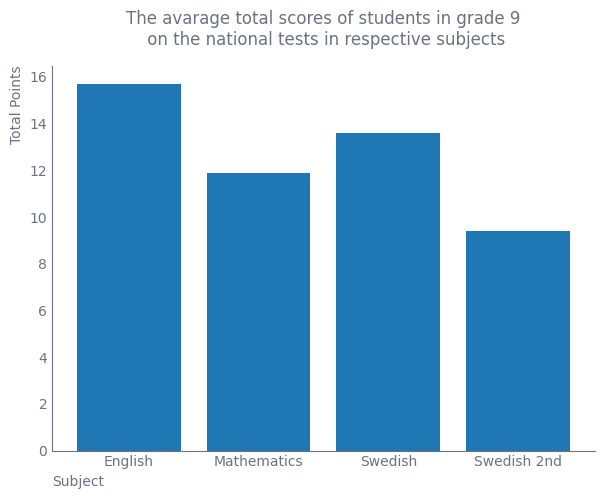

In [488]:
GRAY1 = "#6b7280"

categories = ["English", "Mathematics", "Swedish", "Swedish 2nd"]
total_points = [total_points_english, total_points_mathematics, total_points_swedish, total_points_swedish_2]

fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(categories, total_points)
ax.set_ylabel('Total Points', loc="top", color=GRAY1)
ax.set_xlabel('Subject', loc="left", color=GRAY1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color(GRAY1)
ax.spines["bottom"].set_color(GRAY1)

ax.tick_params(colors=GRAY1)

ax.set_title("The avarage total scores of students in grade 9\n on the national tests in respective subjects", pad=15, color=GRAY1, fontsize=12)
#Alternative to the design is to use: plt.style.use("../labb_2/styles/base.mplstyle") although i wanted use manunal desgins

fig.savefig("Visualisering/plot_c_")


- drop empty row in one of the excel sheets

In [489]:
# drop empty row:
df_swedish_2
index_to_drop = 3
df_swedish_2.drop(index_to_drop, inplace=True)


-  D)

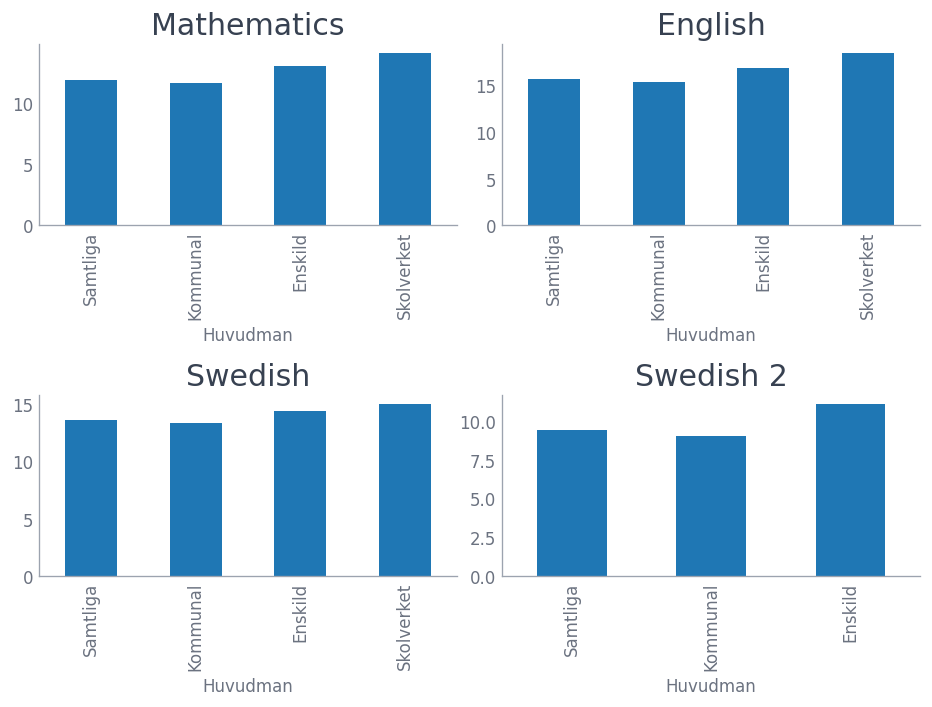

In [490]:
plt.style.use("../labb_2/styles/base.mplstyle")

fig, axes = plt.subplots(2, 2, dpi=120, figsize=(8, 6))
dfs = [df_mathematics, df_english, df_swedish, df_swedish_2]
titles = ["Mathematics", "English", "Swedish", "Swedish 2"]

for ax, df, title in zip(axes.flatten(), dfs, titles):
    df.plot(kind="bar", x="Huvudman", y="Totalt (Poäng)", ax=ax, title=title, legend=False)


plt.tight_layout()
plt.show()
fig.savefig("Visualisering/plot_d_")


- Creating a custom template for plotly, for eventual use 

In [491]:
import plotly.io as pio

custom_template = dict(
    layout=dict(
        title=dict(font=dict(family="Arial", size=20, color="blue")),
        font=dict(family="Arial", size=12),
        plot_bgcolor='rgba(0,0,0,0)',
        xaxis=dict(showgrid=False), 
        yaxis=dict(showgrid=True))
    )

pio.templates["custom_template"] = custom_template


- 1 A)

In [492]:
df_table1b_first = pd.read_excel("../data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7, skipfooter=23 )

df_table1b_first



,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [493]:
df_table1b_first = df_table1b_first.rename(columns={"Totalt.2": "Avarage", "Unnamed: 0": "Year", "Pojkar.2": "Boys", "Flickor.2": "Girls"})

fig = px.line(df_table1b_first, y=["Avarage", "Boys", "Girls"], x="Year", title="Precentage who failed one or more subject", markers=True)

fig.update_layout(yaxis_title="Precentage who failed")
fig.update_layout(template=custom_template)  # applience of custom template, although this is not as accurate as updating layout as the code goes, according to sources. 
fig.show()

fig.write_html("Visualisering/plot_1a_")



- 1 B)

In [494]:
df_table1b_second = pd.read_excel("../data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7, skipfooter=23 )
df_table1b_second

,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [495]:
df_table1b_second = df_table1b_second.rename(columns={"Unnamed: 0": "År", "Totalt": "Medelvärde", "Flickor": "Flickor", "pojkar": "Pojkar"})

fig = px.line(df_table1b_second, y=["Medelvärde", "Flickor", "Pojkar"], x="År", title="snittvärde på elevers meritpoäng per år", markers=True, line_shape="spline")

fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=True))

fig.show()
fig.write_html("Visualisering/plot_1b_")


- 1 C)

In [496]:
df_table1b_third = pd.read_excel("../data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7)

df_table1b_third

,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0
5,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Kommun,216.1,225.6,207.2,223.6,233.8,214.1,28.9,27.4,30.3
7,Enskild,237.9,245.0,230.8,247.2,254.8,239.7,18.7,18.4,19.0
8,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Allmän inriktning,238.5,245.8,231.2,247.9,255.7,240.1,18.0,17.7,18.3


In [497]:
df_table1b_third_sorted = df_table1b_third.rename(columns={"Unnamed: 0": "Föräldrars utbildning", "Totalt": "Elevers meritpoäng"})

gray, red = "#4b5563", "#be123c" 

categories = df_table1b_third_sorted.loc[22:24]

fig = px.bar(categories, y="Elevers meritpoäng", x="Föräldrars utbildning", title="Elevers meritpoäng beroende på deras föräldrars utbildning",)

fig.update_traces(marker_color=[gray, red, red])

fig.show()
fig.write_html("Visualisering/plot_1c_1")


In [498]:
df_table1b_fourth = pd.read_excel("../data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7)
df_table1b_fourth
student_compare = df_table1b_fourth.loc[12:13]

student_compare = student_compare.rename(columns={"Unnamed: 0": "Elever", "Totalt": "Genomsnitt meritpoäng", "Flickor": "Flickor", "pojkar": "Pojkar"})
catergory_orders={"sex": ["Flickor", "Pojkar"]}
fig = px.bar(student_compare, 
             x="Genomsnitt meritpoäng", 
             y="Elever", 
             color_discrete_map={"Flickor": "blue", "Pojkar": "green"},
                             width=1200, height=500,
  # Does not work...
             )

fig.update_layout(
    title="total merit beroende på elevers bakgrund",
    xaxis_title="Meritpoäng",
    yaxis_title="Elever",
    font=dict(size=14),  
    legend=dict(title=None, orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    bargap=0.2, 
    xaxis=dict(tickfont=dict(size=12)),  
    yaxis=dict(tickfont=dict(size=12)),  
)
fig.update_layout(font=dict(family="Arial", size=12))
fig.update_layout(xaxis=dict(showgrid=True), yaxis=dict(showgrid=False))
fig.update_layout(title=dict(x=0.50, y=0.95))  


fig.update_xaxes(tickangle=45)

fig.show()
fig.write_html("Visualisering/plot_1c_2")

-  Jämförelse av betygresultat över tid, gymnasieskola, fokus på antal elever som är behöriga för högskola mellan termin 2022/2023 - 2017/2018)

In [499]:
def read_excels(excel, skiprow_count, skipfooter_count):
    df_name = pd.read_excel(excel, skiprows=skiprow_count, skipfooter=skipfooter_count)
    return df_name

df_subject_results = read_excels("../data/Gymnasieskola - Vad ungdomar gör efter gymnasieskolan 2013 Län.xlsx", 9, 0)

indices_to_select = [0, 3, 7, 10, 13, 17, 20, 24]

new_df = df_subject_results.iloc[indices_to_select]

new_df.drop(["Länskod", "Typ av huvudman", "Antal ungdomar"], axis=1, inplace=True)
new_df.rename(columns={"Etablerade": "Arbetande"}, inplace=True)

melted_df = pd.melt(new_df, id_vars='Län', var_name='Procent typ', value_name='procent')
new_melted_df = melted_df.iloc[:-32]


C:\Users\Noah7\AppData\Local\Temp\ipykernel_24472\2233732796.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Noah7\AppData\Local\Temp\ipykernel_24472\2233732796.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [500]:
colors = px.colors.qualitative.Set1

fig = px.bar(new_melted_df, y="procent", x="Län", color="Procent typ",
              labels={"Percentage": "Procent", "Län": "län", "Percentage_Type": "Procent typ"},
              title="Procent av arbetande och studerande studenter i olika län efter gymnasiet,<br>(resterande procent fattas från skolverket)",
              width=1000, height=600,
              color_discrete_sequence=colors
              )

fig.update_layout(font=dict(family="Arial", size=12))
fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=True))
fig.update_layout(title=dict(x=0.08, y=0.9))  

fig.show()
fig.write_html("Visualisering/plot_2_1:a")

- 2A)

In [501]:
df_highschool = read_excels("C:/Users/Noah7/code/Github/Python-Noah-Eliasson-OPA23/data/Gymnasieskola - Jämförelse av betygsresultat över tid 2023 Län (1).xlsx", 7, 0)



df_highschool_new = df_highschool[(df_highschool['Uppgift'] == "Genomsnittlig betygspoäng") & (df_highschool["Typ av huvudman"] == "Samtliga")]

df_highschool_new = df_highschool_new.reset_index(drop=True)
df_highschool_new

,Län,Länskod,Typ av huvudman,Uppgift,2022/23,2021/22,2020/21,2019/20,2018/19,2017/18,2016/17,2015/16,2014/15,2013/14
0,Blekinge län,10,Samtliga,Genomsnittlig betygspoäng,14,14.3,14.3,14.3,14.3,14.2,14.3,14.2,14,14
1,Dalarnas län,20,Samtliga,Genomsnittlig betygspoäng,14.1,14.1,14.2,14.2,14.1,14.1,14.2,14.1,14,13.9
2,Gotlands län,9,Samtliga,Genomsnittlig betygspoäng,14.1,14.4,14.8,14.6,14.6,14.2,14.4,14.2,14.1,14
3,Gävleborgs län,21,Samtliga,Genomsnittlig betygspoäng,14.3,14.2,14.3,14.2,14,14.1,14,13.8,13.7,13.8
4,Hallands län,13,Samtliga,Genomsnittlig betygspoäng,14.4,14.4,14.4,14.3,14.1,14.1,14,14,14,13.9
5,Jämtlands län,23,Samtliga,Genomsnittlig betygspoäng,14.1,14.1,14.2,14.2,14.1,14.1,14.2,14.1,14,13.9
6,Jönköpings län,6,Samtliga,Genomsnittlig betygspoäng,14.2,14.3,14.3,14.3,14.3,14.2,14.2,14,14,14
7,Kalmar län,8,Samtliga,Genomsnittlig betygspoäng,14.4,14.6,14.6,14.6,14.4,14.4,14.2,14.2,14,13.7
8,Kronobergs län,7,Samtliga,Genomsnittlig betygspoäng,14,13.9,13.9,14,14,13.9,14,13.8,13.6,13.8
9,Norrbottens län,25,Samtliga,Genomsnittlig betygspoäng,14.3,14.4,14.4,14.4,14.2,14.3,14.3,14.1,14.1,14.1


In [502]:
df_highschool_here = pd.melt(
    df_highschool_new,
    id_vars= "Län",
    value_vars= { "2013/14","2014/15","2015/16","2016/17","2017/18","2018/19", "2019/20", "2020/21", "2021/22", "2022/23"},
    var_name= "År",
    value_name= "Betygspoäng"
)
color_map = {
    "Län1": "blue",
    "Län2": "green",
    "Län3": "red",
    # Add more entries as needed
}
# dataframe is not sorted when printing out, sort_values by ascending order to plot correctly 
df_highschool_here_sorted = df_highschool_here.sort_values(by='År')

fig = px.line(df_highschool_here_sorted, x="År", y="Betygspoäng", color="Län", markers=True)
fig.show()

In [505]:
df_highschool_here_sorted

,Län,År,Betygspoäng
209,Östergötlands län,2013/14,13.8
189,Blekinge län,2013/14,14
190,Dalarnas län,2013/14,13.9
191,Gotlands län,2013/14,14
192,Gävleborgs län,2013/14,13.8
...,...,...,...
185,Västmanlands län,2022/23,14.3
186,Västra Götalands län,2022/23,14.4
187,Örebro län,2022/23,14.1
180,Södermanlands län,2022/23,14.1
